In [5]:
#!pip install geopandas

In [1]:
import os
import time
from datetime import date, timedelta

import pandas as pd
import numpy as np

import requests 
from bs4 import BeautifulSoup

import io
import re
import itertools
import zipfile

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gp
import numpy as np
import sys

from matplotlib import cm
import geopandas

In [2]:
pays = pd.read_excel("PaysdAfrique.xlsx")

In [3]:
med = pd.read_excel("Medical Devices Africa.xlsx")

In [4]:
med["Women"] = pd.to_numeric(med.Women, errors='coerce')
med["MAM"] = pd.to_numeric(med.MAM, errors='coerce')
med["mamo"] = med["MAM"]*med["Women"]/100

In [5]:
North = ["MAR","DZA","TUN","LBY","EGY","SDN", "SSD"]
South = ["NAM","BWA","ZAF","SWZ","LSO"] 
Central = ["TCD","CAF","CMR","GNQ","GAB","COG","COD","AGO", "STP"]#ok

West = ["MRT","SEN","GMB","GIN","SLE","LBR","GHA","TGO","BEN","NGA", "BFA", "CPV", "CIV", "GNB", "MLI", "NER",'ESH']
East = ["BDI", "COM", "DJI", "ERI", "ETH", "KEN", "MDG", "MWI", "MUS", "MOZ", "RWA", "SYC", "SOM", "UGA", "ZMB", "ZWE", "TZA", "-99"]

In [6]:
path = gp.datasets.get_path('naturalearth_lowres')
earth = gp.read_file(path)
africa = earth[earth.continent=='Africa'].copy()

In [7]:
orient = earth[earth.continent=='Asia'].copy()
pal = orient[orient.name=='Palestine']
pal.to_csv(r'earth.csv', index = False)

In [8]:
t = africa['iso_a3'].copy()
reg = ['NULL' for i in range(len(t))]
for i in range(51):
    x = t.iloc[i]
    if x in North:
        reg[i] = 'North'
        #print(reg)
    elif x in East:
        reg[i] = 'East'
    elif x in West:
        reg[i] = 'West'
    elif x in Central:
        reg[i] = 'Central'
    elif x in South:
        reg[i] = 'South'
    else:
        reg[i] = 'NULL'
print(reg)
africa['Region'] = reg
africa = africa.sort_values('Region').copy()

['East', 'West', 'Central', 'East', 'East', 'North', 'Central', 'South', 'South', 'East', 'South', 'South', 'West', 'West', 'West', 'West', 'West', 'West', 'Central', 'West', 'West', 'West', 'West', 'West', 'West', 'West', 'West', 'Central', 'Central', 'Central', 'Central', 'East', 'East', 'East', 'South', 'Central', 'East', 'East', 'West', 'North', 'North', 'East', 'North', 'North', 'North', 'East', 'East', 'East', 'East', 'East', 'North']


In [9]:
africa[['name']].head()

,name
66,Central African Rep.
11,Dem. Rep. Congo
68,Gabon
69,Eq. Guinea
15,Chad


In [10]:
med['name'] = med['Country']
med = med.sort_values(by=['name'])

In [11]:
df = africa.merge(med, on='name').copy()
df = df.sort_values(by=['name'])

In [12]:
med['summe'] = round((med['CT'] + med['MRI'] + med['PET'] + med['GC'] + med['LA'] + med['TU'] + med['R'] + med['mamo']),1)
df = africa.merge(med, on='name').copy()

df.sort_values(by=['summe'], inplace=True, ascending=False)
df[['Country', "summe"]].head()

,Country,summe
22,Tunisia,17.4
25,Libya,17.3
32,Namibia,9.5
2,Gabon,9.1
23,Morocco,3.8


In [13]:
max(med['MAM'])
med[['Country','MAM','mamo']]

,Country,MAM,mamo
0,Algeria,0.00,0.00000
1,Angola,6.33,0.21522
2,Benin,16.01,0.68843
3,Botswana,19.10,1.10780
4,Burkina Faso,13.59,0.53001
5,Burundi,2.69,0.09953
6,Cabo Verde,140.60,8.85780
7,Cameroon,17.40,0.64380
8,Central African Rep.,4.68,0.19656
9,Chad,4.67,0.15878


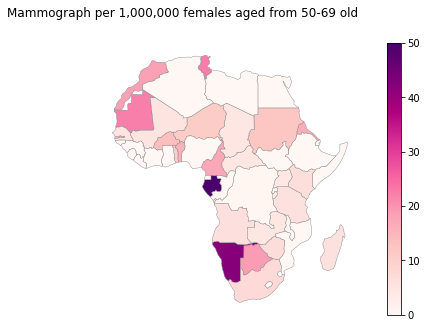

In [20]:
from matplotlib import cm
cmap = cm.get_cmap('RdPu')
#cmap = cm.get_cmap('Paired')
#cmap = cm.get_cmap('tab20c')
#cmap = cm.get_cmap('Accent')

#from cartopy import crs as ccrs
# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, axs = plt.subplots(1,1,figsize=(10, 5), sharex=True, sharey=True)
fig.suptitle('Mammograph per 1,000,000 females aged from 50-69 old')
# Make the CartoPy plot
line1 = df.plot(column='MAM', cmap=cmap, legend=True, linewidth=0.4, ax=axs, edgecolor='0.5', vmin=0, vmax=50)
axs.axis('off')
plt.savefig(r'mam2.png')
plt.show()

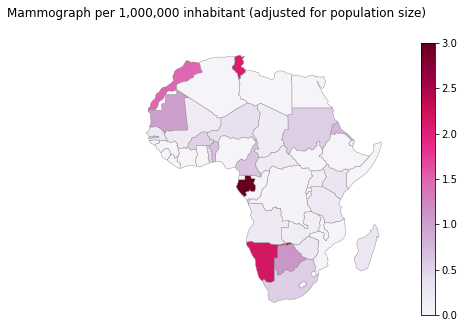

In [21]:
from matplotlib import cm
cmap = cm.get_cmap('PuRd')
#cmap = cm.get_cmap('Paired')
#cmap = cm.get_cmap('tab20c')
#cmap = cm.get_cmap('Accent')

#from cartopy import crs as ccrs
# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, axs = plt.subplots(1,1,figsize=(10, 5), sharex=True, sharey=True)
fig.suptitle('Mammograph per 1,000,000 inhabitant (adjusted for population size)')
# Make the CartoPy plot
line1 = df.plot(column='mamo', cmap=cmap, legend=True, linewidth=0.4, ax=axs, edgecolor='0.5', vmin=0, vmax=3)
axs.axis('off')
plt.savefig(r'mam1.png')
plt.show()

In [16]:
med[['Country', "mamo"]].sort_values(by=['mamo']).tail(12)

,Country,mamo
17,Eritrea,0.77832
31,Mauritania,1.00890
3,Botswana,1.10780
47,Swaziland,1.27756
10,Comoros,1.40715
33,Morocco,1.49526
50,Tunisia,2.07736
35,Namibia,2.15730
19,Gabon,3.07104
32,Mauritius,6.01128


In [17]:
med[['Country', "MAM"]].sort_values(by=['MAM']).tail(12)

,Country,MAM
7,Cameroon,17.40
33,Morocco,18.46
3,Botswana,19.10
31,Mauritania,22.42
50,Tunisia,22.58
10,Comoros,31.27
47,Swaziland,33.62
35,Namibia,42.30
32,Mauritius,49.68
19,Gabon,73.12


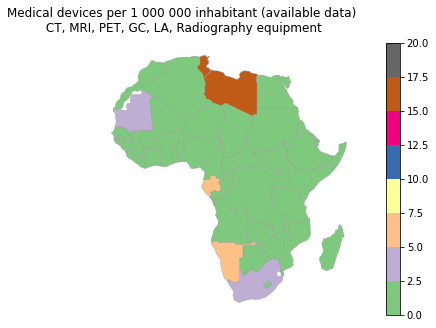

,Country,summe
25,Libya,17.3
22,Tunisia,15.4
32,Namibia,7.4
2,Gabon,6.0
29,South Africa,2.9


In [18]:
med['summe'] = round((med['CT'] + med['MRI'] + med['PET'] + med['GC'] + med['LA'] + med['TU'] + med['R']),1)
df = africa.merge(med, on='name').copy()

#cmap = cm.get_cmap('Paired')
#cmap = cm.get_cmap('tab20c')
cmap = cm.get_cmap('Accent')

#from cartopy import crs as ccrs
# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, axs = plt.subplots(1,1,figsize=(10, 5), sharex=True, sharey=True)
fig.suptitle('Medical devices per 1 000 000 inhabitant (available data)\n CT, MRI, PET, GC, LA, Radiography equipment')
# Make the CartoPy plot
line1 = df.plot(column='summe', cmap=cmap, legend=True, linewidth=0.4, ax=axs, edgecolor='0.6', vmin=0, vmax=20)
axs.axis('off')
plt.savefig(r'med7.png')
plt.show()

df.sort_values(by=['summe'], inplace=True, ascending=False)
df[['Country', "summe"]].head()

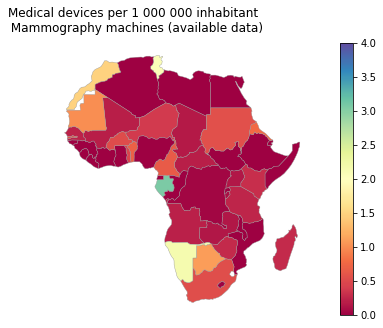

,Country,mamo
2,Gabon,3.07104
32,Namibia,2.15730
22,Tunisia,2.07736
23,Morocco,1.49526
31,Botswana,1.10780


In [19]:
df = africa.merge(med, on='name').copy()

cmap = cm.get_cmap('Paired')
cmap = cm.get_cmap('Spectral')
#cmap = cm.get_cmap('Accent')

#from cartopy import crs as ccrs
# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, axs = plt.subplots(1,1,figsize=(10, 5), sharex=True, sharey=True)
fig.suptitle('Medical devices per 1 000 000 inhabitant \n Mammography machines (available data)')
# Make the CartoPy plot
line1 = df.plot(column='mamo', cmap=cmap, legend=True, linewidth=0.4, ax=axs, edgecolor='0.6', vmin=0, vmax=4)
axs.axis('off')
plt.savefig(r'med8.png')
plt.show()

df.sort_values(by=['mamo'], inplace=True, ascending=False)
df[['Country', "mamo"]].head()